# Graph 상에 임의로 Dot을 찍어서 차수에 따른 그래프의 변화 확인

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## 1차원 그래프

In [2]:
X = np.arange(1,11).reshape(10,1)
y = np.array([7,8,7,13,16,15,19,23,18,21]).reshape(10,1)

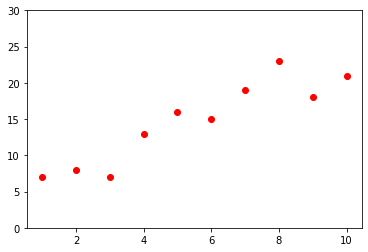

In [4]:
plt.plot(X, y, 'ro')

axes = plt.gca()
axes.set_ylim([0,30])

plt.show()

overfitting된 경우 w(가중치) 값이 어떻게 변화하는가

# Perform LiearRegression

## 1차원 그래프

In [5]:
reg = LinearRegression()
reg.fit(X,y)

print(reg.intercept_)
print(reg.coef_)

[4.93333333]
[[1.77575758]]


In [6]:
y_pred = reg.predict(X)

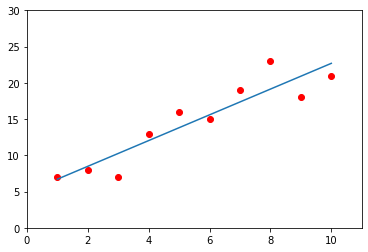

In [7]:
plt.plot(X,y,'ro')
plt.plot(X, y_pred)

# gca = 그래프의 '축' 을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30]) # gca를 이용해 y의 범위를 0~30으로 늘려준다
plt.show()

## 2차원 그래프

In [9]:
# np.c_ => 1차원 배열 두 개를 col 방향으로 나열해서 concatenation(X^2)
X_2 = np.c_[X,X**2]
X_2

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [10]:
reg = LinearRegression()
reg.fit(X_2, y)

print(reg.intercept_)
print(reg.coef_)

[2.43333333]
[[ 3.02575758 -0.11363636]]


In [11]:
y_pred_2 = reg.predict(X_2)

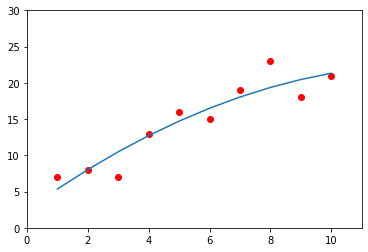

In [13]:
plt.plot(X,y,'ro')
plt.plot(X_2[:,0], y_pred_2)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

## 3차원 그래프

In [14]:
X_3 = np.c_[X,X**2,X**3]
X_3

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [15]:
from sklearn.preprocessing import PolynomialFeatures


polynomial = PolynomialFeatures(degree=3, include_bias=False)
X_3_poly = polynomial.fit_transform(X)
X_3_poly

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [19]:
reg = LinearRegression()
reg.fit(X_3_poly, y)

w0 = reg.intercept_
w = reg.coef_

print(w)

print("w0: ", w0)
print("w1: ", w[0][0])
print("w2: ", w[0][1])
print("w3: ", w[0][2])

[[-1.2020202   0.8030303  -0.05555556]]
w0:  [7.2]
w1:  -1.202020202020208
w2:  0.8030303030303003
w3:  -0.05555555555555544


x=2일 때의 y 값은?

In [23]:
x_2 = np.array([2,4,8])

y_2 = x_2@w.reshape(-1,1)+w0
y_2

array([7.56363636])

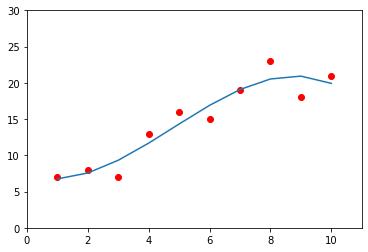

In [18]:
y_pred_3 = reg.predict(X_3_poly)

plt.plot(X,y,'ro')
plt.plot(X_3_poly[:,0], y_pred_3)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

x 값의 범위를 좁게해서 그래프를 부드럽게

In [24]:
X_new = np.arange(-5,15,0.01).reshape(-1,1)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3, include_bias=False)

X_new_3 = polynomial.fit_transform(X_new)

In [32]:
y_pred_3 = (X_new_3 @ w.reshape(-1,1)) + w0

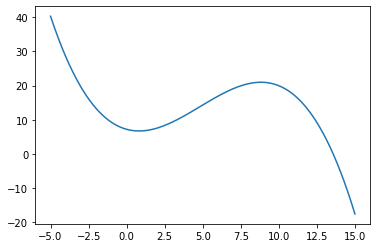

In [33]:
plt.plot(X_new, y_pred_3)

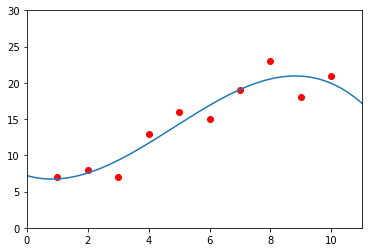

In [34]:
plt.plot(X,y,'ro')
plt.plot(X_new, y_pred_3)

axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

## 7차원 그래프

In [37]:
polynomial = PolynomialFeatures(degree = 7, include_bias=False)
X_7 = polynomial.fit_transform(X)

In [41]:
X_7

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00],
       [2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01,
        3.200000e+01, 6.400000e+01, 1.280000e+02],
       [3.000000e+00, 9.000000e+00, 2.700000e+01, 8.100000e+01,
        2.430000e+02, 7.290000e+02, 2.187000e+03],
       [4.000000e+00, 1.600000e+01, 6.400000e+01, 2.560000e+02,
        1.024000e+03, 4.096000e+03, 1.638400e+04],
       [5.000000e+00, 2.500000e+01, 1.250000e+02, 6.250000e+02,
        3.125000e+03, 1.562500e+04, 7.812500e+04],
       [6.000000e+00, 3.600000e+01, 2.160000e+02, 1.296000e+03,
        7.776000e+03, 4.665600e+04, 2.799360e+05],
       [7.000000e+00, 4.900000e+01, 3.430000e+02, 2.401000e+03,
        1.680700e+04, 1.176490e+05, 8.235430e+05],
       [8.000000e+00, 6.400000e+01, 5.120000e+02, 4.096000e+03,
        3.276800e+04, 2.621440e+05, 2.097152e+06],
       [9.000000e+00, 8.100000e+01, 7.290000e+02, 6.561000e+03,
        5.904900

In [40]:
reg = LinearRegression()
reg.fit(X_7,y)

w0 = reg.intercept_
w = reg.coef_

print(w, "\n" )

print("w0: ", w0)
print("w1: ", w[0][0])
print("w1: ", w[0][1])
print("w1: ", w[0][2])
print("w1: ", w[0][3])
print("w1: ", w[0][4])
print("w1: ", w[0][5])
print("w1: ", w[0][6])

[[ 2.78539901e+02 -2.37257519e+02  9.94563695e+01 -2.25924743e+01
   2.83667484e+00 -1.84910131e-01  4.87861812e-03]] 

w0:  [-113.79999981]
w1:  278.5399014236802
w1:  -237.257519321223
w1:  99.45636954838358
w1:  -22.592474263398188
w1:  2.836674840115315
w1:  -0.18491013093279265
w1:  0.004878618119258213


- overfitting 발생: w 값이 기하급수적으로 증가

x=2일 때의 값을 구해보자

In [42]:
y_2 = (np.array([2,4,8,16,32,64,128])) @ w.reshape(-1,1) + w0
y_2

array([7.98490355])

In [43]:
print(["{:0.3f}".format(x) for x in reg.coef_.reshape(-1)])

['278.540', '-237.258', '99.456', '-22.592', '2.837', '-0.185', '0.005']


w와 intercept 값을 이용해서 그래프 그려보기

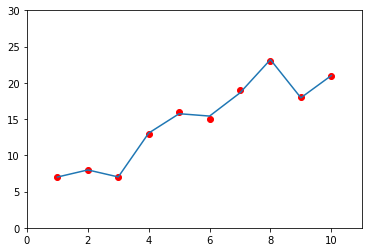

In [45]:
y_pred_7 = X_7@w.reshape(-1,1)+w0

plt.plot(X,y,'ro')
plt.plot(X, y_pred_7)

axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

In [46]:
X_new = np.arange(1,10.5,0.01).reshape(-1,1)
polynomial = PolynomialFeatures(degree=7, include_bias=False)
X_new_7 = polynomial.fit_transform(X_new)

In [47]:
y_7_new = (X_new_7 @ reg.coef_.reshape(-1,1)) + reg.intercept_

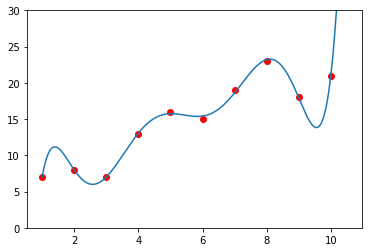

In [48]:
plt.plot(X,y,'ro')
plt.plot(X_new, y_7_new)

axes = plt.gca()
axes.set_ylim([0,30])
plt.show()

# 가장 피해야 할 것 중 하나인 overfitting을 방지해보자

## Ridge Method

In [49]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge(alpha=1.0) #alpha=lambda

ridge.fit(X_7,y)

Ridge()

In [52]:
y_pred_ridge = ridge.predict(X_7)

In [55]:
w0 = ridge.intercept_
w = ridge.coef_

print(w, "\n" )

print("w0: ", w0)
print("w1: ", w[0][0])
print("w1: ", w[0][1])
print("w1: ", w[0][2])
print("w1: ", w[0][3])
print("w1: ", w[0][4])
print("w1: ", w[0][5])
print("w1: ", w[0][6])

[[-2.34723213e-01 -9.30910793e-02  6.16961614e-01 -2.74594734e-01
   5.50301419e-02 -5.15343047e-03  1.80531322e-04]] 

w0:  [6.52078565]
w1:  -0.2347232131335887
w1:  -0.09309107928635957
w1:  0.6169616138908628
w1:  -0.274594733885231
w1:  0.05503014186861977
w1:  -0.005153430468682524
w1:  0.00018053132188439115


값이 줄어든 거 확인


In [56]:
print(["{:0.3f}".format(x) for x in ridge.coef_.reshape(-1)])

['-0.235', '-0.093', '0.617', '-0.275', '0.055', '-0.005', '0.000']


In [ ]:
plt.f